In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.decomposition import PCA #主成分分析器
from sklearn.datasets import load_iris
from pandas import plotting 

In [68]:
# irisデータセットをロード
iris = load_iris()
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_target = pd.DataFrame(iris.target, columns=['class'])

# 冒頭を表示
iris_data.head(), iris_target.head()

(   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                5.1               3.5                1.4               0.2
 1                4.9               3.0                1.4               0.2
 2                4.7               3.2                1.3               0.2
 3                4.6               3.1                1.5               0.2
 4                5.0               3.6                1.4               0.2,
    class
 0      0
 1      0
 2      0
 3      0
 4      0)

In [57]:
#データとクラスを一つのまとめる
iris_join = iris_target.join(iris_data)

# 冒頭を表示
iris_join.head()

,class,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,5.1,3.5,1.4,0.2
1,0,4.9,3.0,1.4,0.2
2,0,4.7,3.2,1.3,0.2
3,0,4.6,3.1,1.5,0.2
4,0,5.0,3.6,1.4,0.2


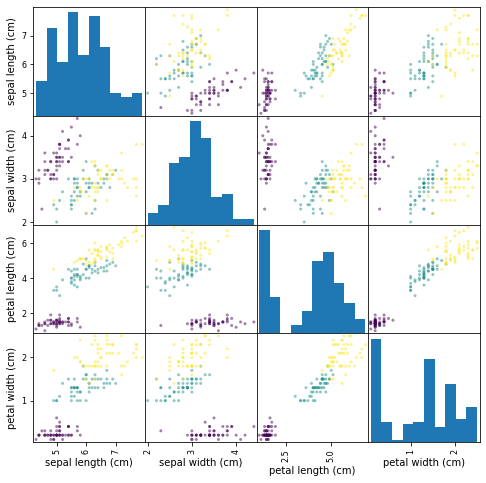

In [58]:
# 散布図行列を作成
plotting.scatter_matrix(iris_join.iloc[:, 1:], figsize=(8, 8), c=list(iris_join.iloc[:, 0]), alpha=0.5)
plt.show()

In [59]:
# 行列を標準化する
iris_stdz = iris_join.iloc[:, 1:].apply(lambda x: (x-x.mean())/x.std(), axis=0)

# 冒頭を表示
iris_stdz.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052


In [60]:
# 主成分分析を実行する
pca = PCA()
pca.fit(iris_stdz)

In [61]:
# 主成分の数を確認
pca.n_components_

4

In [82]:
# 寄与率を表示
pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(iris_stdz.columns))], columns=['寄付率'])

,寄付率
PC1,0.729624
PC2,0.228508
PC3,0.036689
PC4,0.005179


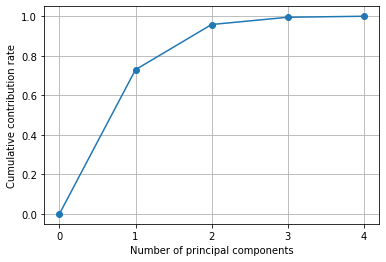

In [71]:
# 累積寄与率を図示する
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

In [70]:
# 因子負荷量を表示
pd.DataFrame(pca.components_, index=["PC{}".format(x + 1) for x in range(len(iris_stdz.columns))], columns=iris.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
PC1,0.521066,-0.269347,0.580413,0.564857
PC2,0.377418,0.923296,0.024492,0.066942
PC3,-0.719566,0.244382,0.142126,0.634273
PC4,-0.261286,0.123510,0.801449,-0.523597


In [73]:
# 固有値を表示
pd.DataFrame(pca.explained_variance_, index=["PC{}".format(x + 1) for x in range(len(dfs.columns))], columns=['固有値'])

,固有値
PC1,2.918498
PC2,0.914030
PC3,0.146757
PC4,0.020715


In [74]:
# 固有ベクトルを表示
pd.DataFrame(pca.components_, columns=iris_join.columns[1:], index=["PC{}".format(x + 1) for x in range(len(iris_stdz.columns))])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
PC1,0.521066,-0.269347,0.580413,0.564857
PC2,0.377418,0.923296,0.024492,0.066942
PC3,-0.719566,0.244382,0.142126,0.634273
PC4,-0.261286,0.123510,0.801449,-0.523597


In [77]:
# データを主成分空間に写像
feature = pca.transform(iris_stdz)

# 主成分得点を表示
pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(iris_stdz.columns))])#.head()

,PC1,PC2,PC3,PC4
0,-2.257141,0.478424,-0.127280,-0.024088
1,-2.074013,-0.671883,-0.233826,-0.102663
2,-2.356335,-0.340766,0.044054,-0.028282
3,-2.291707,-0.595400,0.090985,0.065735
4,-2.381863,0.644676,0.015686,0.035803
...,...,...,...,...
145,1.864258,0.385674,0.255418,-0.387957
146,1.559356,-0.893693,-0.026283,-0.219457
147,1.516091,0.268171,0.179577,-0.118773
148,1.368204,1.007878,0.930279,-0.026041


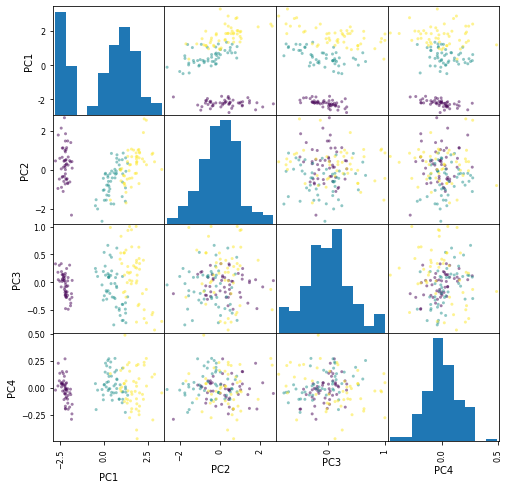

In [81]:
# 主成分得点の散布図行列を作成
plotting.scatter_matrix(pd.DataFrame(feature, 
                        columns=["PC{}".format(x + 1) for x in range(len(iris_stdz.columns))]), 
                        figsize=(8, 8), c=list(iris_join.iloc[:, 0]), alpha=0.5)
plt.show()

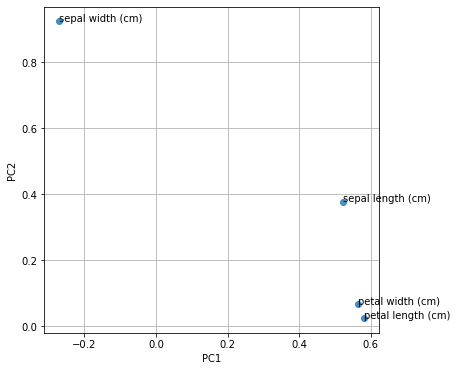

In [84]:
# 第一主成分と第二主成分における観測変数の寄与度をプロットする
plt.figure(figsize=(6, 6))
for x, y, name in zip(pca.components_[0], pca.components_[1], iris_join.columns[1:]):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()